<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **럭키백의 확률**

럭키백은 구성품을 모른 채 먼저 구매하고 배송받은 다음에야 비로소 구성품을 알 수 있는 상품이다.

이번 예제에서는 럭키백에 들어간 생선의 길이, 높이, 두께, 대각선 길이, 무게가 주어졌을 때 7개 생선에 대한 확률을 출력한다.

예를 들어 도미인지, 빙어인지 분류하면서 이 샘플이 '도미다'라고 얼마나 확신하는지를 확률로 표현된다.

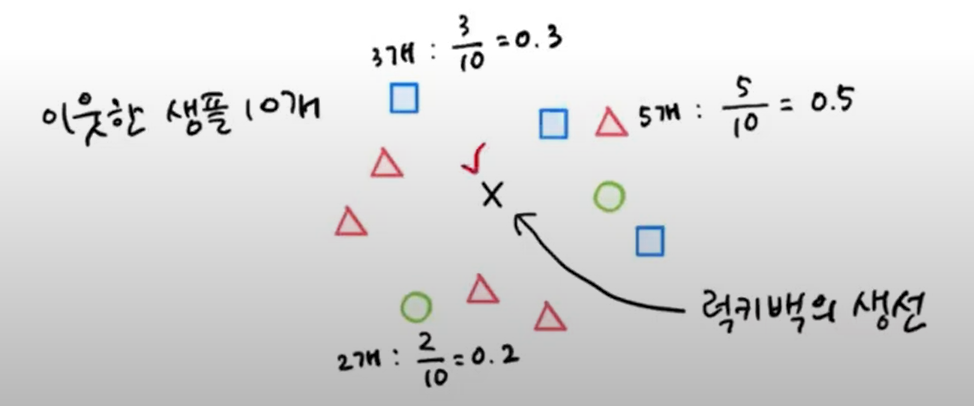

k-최근접 이웃 알고리즘은 이웃한 샘플 중 다수인 클래스를 예측 클래스로 이용한다.

그림을 보면 샘플x 주위에 가장 가까운 이웃 샘플 10개를 표시했다.

사각형이 3개, 삼각형이 5개, 원이 2개다.

이웃한 샘플의 클래스를 확률로 삼는다면 샘플 x가 사각형일 확률은 30%, 삼각형일 확률은 50%, 원일 확률은 20%다.

---
사이킷런의 k-최근접 이웃 분류기도 이와 동일한 방식으로 이웃한 샘플의 클래스 비율을 계산하여 확률로 출력한다.

# **데이터 준비하기**

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


지난 예제처럼 판다스의 read_csv() 함수로 인터넷 주소의 데이터를 읽어서 데이터프레임으로 변환했다.

---

데이터프레임 객체에는 굉장히 많은 기능이 있다.

그 중 head()메소드를 사용해서 데이터프레임의 처음 몇 개의 행을 테이블로 출력했다.

맨 왼쪽에 0, 1, 2, ... 같은 숫자는 행 번호(판다스의 인덱스)이다.

맨 위에 쓰여진 첫 번째 줄의 헤더는 csv파일의 첫 줄로 열 제목이다.

판다스는 csv파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어준다.

---

※ 여기서 잠깐 ※

데이터프레임은 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다.

데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있다.

데이터프레임은 통계와 그래프를 위한 메소드를 풍부하게 제공한다.

또 데이터프레임은 넘파이로 상호 변환이 쉽고 사이킷런과도 호환이 잘된다.

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_target = fish['Species'].to_numpy()

이 데이터프레임에서 Species 열에는 7개의 생선에 대한 종류가 담겨져있는데 이 데이터를 타깃으로 사용한다.

그리고 나머지 5개 열은 특성으로 입력 데이터로 사용한다.

---

데이터프레임에서 열을 선택하는 방법은 원하는 열 이름을 리스트로 나열하면 된다.

여러 열을 선택하면 새로운 데이터프레임이 반환된다.

이를 to_numpy() 메소드로 넘파이 배열로 바꾸면 된다.

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

훈련 세트와 테스트 세트를 나누고, 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리했다.

참고로 훈련 세트의 통계 값으로 테스트 세트를 변환해야한다.

# **k-최근접 이웃의 다중 분류**

In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


사이킷런의 KNeighborsClassifier 클래스 객체를 만들고, 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인했다.

최근접 이웃 개수는 default 5가 아닌 3으로 지정하여 사용했다.

---

타깃 데이터를 만들 때 Species를 사용했다.

그렇기 때문에 7개의 생선 종류가 문자열로 들어가있다.

이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류(Multi-Class Classification)이라고 부른다.

---

2장에서는 이진 분류를 다룰 때 양성 클래스를 1, 음성 클래스를 0, 각각 정수로 타깃 데이터를 만들었다.

사실 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런은 숫자뿐만아니라 문자열도 타깃값으로 받아들일 수 있다.

문자열로 타깃값을 그대로 사이킷런 모델에 전달하면 모델이 자동으로 정수로 바꿔서 훈련한다.

주의할 점은 순서가 자동으로 알파벳 순으로 매겨진다.

In [6]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


훈련 후에 타깃값, 클래스가 어떤 것이 있는지 확인하는 방법은 KNeighborsClassifier 객체의 classes_ 속성을 사용하면 된다.

그러면 알파벳 순으로 첫 번째 클래스가 Bream, 두 번째 클래스가 Parkki, ... , 일곱 번째 클래스가 Whitefish가 된다.

In [7]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


predict() 메소드로 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측하면 0, 1같은 정수가 아니라 이름(문자열)로 출력된다.

모델은 테스트 세트의 첫 번째 샘플을 Perch로 예측한 것이다.

In [8]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


모델이 앞에서 본 5개 샘플을 해당 클래스로 어떤 확률로 예측했는지 확인하는 방법은 predict_proba()메소드이다.

사이킷런의 분류 모델은 predict_proba()메소드로 클래스별 확률값을 반환한다.

---

※ 여기서 잠깐 ※

predict_proba()메소드가 없는 모델도 있기는 하다.

이유는 그런 모델들은 확률을 계산하기 위해서 자원이 너무 많이 들기때문이다.

그런 모델들은 확률을 얻고 싶으면 매개변수로 지정해야한다.

대부분은 predict_proba()메소드를 제공한다.

---

5개의 샘플이 행으로 출력되고, 7개의 생선(클래스)에 대해서 확률이 열에 출력된다.

predict_proba() 메소드의 출력 순서는 classes_속성과 같다.

첫 번째 열은 첫 번째 클래스(Bream)에 대한 확률, 두 번째 열은 두 번째 클래스(Parkki)에 대한 확률, 세 번째 열은 세 번째 클래스(Perch)에 대한 확률, ... ,일곱 번째 열은 일곱 번째 클래스(Whitefish)에 대한 확률이다.

모델은 첫 번째 샘플은 100% 확률로 Perch라고 예측했고, 네 번째 샘플은 약 67%확률로 Perch라고 예측했다.

---

넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림을 하는데, decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

In [9]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보았다.

네 번째 샘플의 최근접 이웃의 클래스를 확인해보았는데 다섯 번째 클래스인 Roach가 1개, 세 번째 클래스인 Perch가 2개로 나왔다.

따라서 다섯 번째 클래스에 대한 확률은 1/3, 세 번째 클래스에 대한 확률은 2/3이 된 것이다.

하지만 k-최근접 이웃 알고리즘을 이용한 이 모델은 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부다. 

# **로지스틱 회귀(Logistic Regression)**

로지스틱 회귀는 이름은 회귀이지만 분류 모델이다.

분류 알고리즘 중에서 가장 대표적인 분류 알고리즘으로 어떤 책이나 어떤 자료에서 가장 맨 처음에 배우는 분류 알고리즘이다.

인공신경망의 기본이 되는 알고리즘이 로지스틱 회귀이다.

은닉층이 없는 가장 기본적인 인공신경망과 로지스틱 회귀를 비교했을 때 서로 구분하기 어려울 정도로 거의 동일하다.

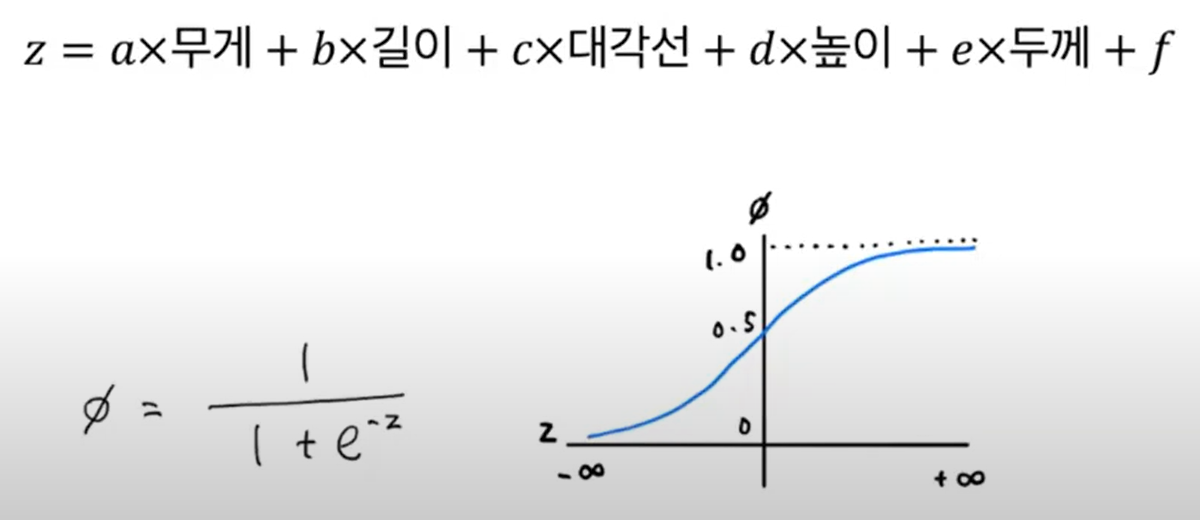

로지스틱 회귀는 선형 회귀와 동일하게 선형 방정식을 학습한다.

z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f

5개의 특성을 사용하기 때문에 a, b, c, d, e로 가중치(계수 or 기울기)가 5개이다.

특성이 늘어났지만 가중치랑 특성을 곱해서 절편을 더한 다음 어떤 값을 구하는 것이 이전에 배운 다룬 다중(선형) 회귀와 같다.

---

만약 선형 방정식의 출력값 z를 그대로 사용하면 z는 어떤 값도 가능해서 -무한대 ~ +무한대 사이의 어떤 값이 나오는 회귀가 될 것이다.

하지만 분류로 사용하기 위해 그 값을 0 ~ 1 사이의 확률로 만들어야한다.

그 방법이 바로 시그모이드 함수(Sigmoid Function, 로지스틱 함수)이다.

---

시그모이드 함수를 사용하면 z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수일 경우 이 함수는 1에 가까워진다.

z가 0이 될 때는 0.5가 된다.

z가 어떤 값이 되더라도 이 함수는 0 ~ 1사이의 범위를 벗어나지 않는다.

그래서 0 ~ 1 사이 값을 0 ~ 100%까지 확률로 해석할 수 있게 되고, 만약 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스라고 판단할 수 있다.

근데 시그모이드 함수에 전달하지 않아도 z값만 봐도 z값이 음수이면 음성 클래스, z값이 양수이면 양성 클래스를 판단이 된다.

시그모이드 함수를 사용하는 이유는 확률을 출력하기 위해서이다.

---

그래서 predict() 메소드는 z값만 보고 판단을 하고, predict_proba() 메소드는 파이값을 계산해서 확률을 출력한다.

---

※ 여기서 잠깐 ※

정확히 0.5일 때는 라이브러리마다 다를 수 있다.

사이킷런은 0.5일 때 음성 클래스로 판단한다.

# **로지스틱 회귀로 이진 분류 수행하기**

In [10]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


넘파이 배열은 True, False값을 전달하여 행을 선택할 수 있다.

이것을 불리언 인덱싱이라 한다.

---

다음과 같이 'A'에서 'E'까지 5개의 원소로 이루어진 배열이 있다고 하자

여기서 'A'와 'C'만 선택하려면 첫 번째 원소와 세 번째 원소만 True이고 나머지 원소는 False인 배열을 전달하면 된다

In [20]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

불리언 인덱싱을 사용하여 훈련 세트에서 도미(Bream)과 빙어(Smelt) 행만 골라내겠다.

비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다.

예를 들어 도미인 행을 골라내려면 train_target == 'Bream'과 같이 쓰면 된다.

이 비교식은 train_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열을 반환한다.

도미와 빙어에 대한 비교 결과를 비트 OR 연산자(\)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있다.

---

이 데이터를 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 도미와 빙어 데이터만 골라낼 수 있다.

도미와 빙어로 골라낸 데이터로 로지스틱 회귀 모델을 훈련하면 된다.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

로지스틱 회귀 모델(LogisticRegression 클래스)은 선형 회귀와 마찬가지로 사이킷런의 linear_model 패키지 하위에 있다.

LogisticRegression 클래스를 임포트하고 객체를 만들어서 위에서 만든 훈련 데이터를 fit()메소드에 전달해서 훈련한다.

그리고 predict() 메소드로 예측하면 된다.

In [13]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


처음 5개의 샘플을 예측했다.

모델은 두 번째 샘플을 제외하고 모두 도미로 예측했다.

In [14]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


KNeighborsClassifier와 마찬가지로 예측 확률은 predict_proba()메소드에서 제공한다.

처음 5개 샘플의 예측 확률을 출력했다.

---

이진 분류이므로 첫 번째 열이 음성 클래스(0), 두 번째 열이 양성 클래스(1)에 대한 확률이 나왔다.

In [15]:
print(lr.classes_)

['Bream' 'Smelt']


k-최근접 이웃 분류에서 보았듯이 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용한다.

classes_속성에서 확인하면 빙어(Smelt)가 양성 클래스, 도미(Bream)가 음성 클래스인 것을 알 수 있다.

---

마치 빙어를 찾는 모델처럼 보인다. 그러면 도미(Bream)을 양성 클래스로 사용하려면 어떻게 해야 할까?

2장에서 했던 것처럼 Bream인 타깃값을 1로 만들고 나머지 값은 0으로 만들어 사용하면 된다.

In [16]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


로지스틱 회귀도 선형 회귀처럼 선형 방정식을 학습한다.

그래서 가중기(계수, 기울기)와 절편을 출력할 수 있다.

---

coef_, intercept_ 속성을 사용해서 출력해보면 로지스틱 회귀 모델이 학습한 선형 방정식은

z = - 0.404 * (Weight) - 0.576 * (Length) - 0.663 * (Diagonal) - 1.013 * (Height) - 0.732 * (Width) - 2.161

이라는 것을 확인할 수 있다.

특성이 5개이므로 특성에 곱해지는 가중치도 당연히 5개가 나왔다.

In [17]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


대부분의 사이킷런의 분류 모델은 predict_proba()메소드처럼 z 값을 계산해서 출력하는 메소드, decision_function()메소드를 제공한다.

---

처음 5개 샘플의 z 값을 출력했다.

이 값을 가지고 sigmoid 함수에 넣어서 앞에서 나왔던 확률 값과 같은지 확인해보겠다.



In [18]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


파이썬의 사이파이(Scipy) 라이브러리에 시그모이드 함수가 있다.

사이파이의 special 패키지 하위에 expit() 임포트해서 처음 5개 샘플의 z 값을 전달하면 시그모이드 함수를 통과한 확률값이 나온다.

---

출력된 값을 보면 predict_proba() 메소드 출력의 두 번째 열과 동일하다.

우리가 알 수 있는 것은 로지스틱 회귀가 이진 분류일 경우 decision_function() 메소드는 양성 클래스에 대한 z값을 반환한다는 것이다.

그래서 선형 방정식이 한 개이다. 이 방정식이 양성 클래스에 대한 z값을 계산한다.

z값이 0보다 크면 양성 클래스, 0보다 작으면 음성 클래스.

---

predict_proba() 메소드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다. 

음성 클래스의 확률 값은 1에서 양성 클래스의 확률을 빼면 된다.

# **로지스틱 회귀로 다중 분류 수행하기**

여러 개의 클래스를 분류하는 문제를 다중 분류라고 한다.

다중 분류 문제도 이진 분류 문제처럼 LogisticRegression 클래스를 사용할 수 있다.

In [21]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.

max_iter 매개변수에서 반복 횟수를 지정하면 default는 100이다.

근데 기본값 100으로 두고 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생한다.

그래서 충분하게 훈련시키기 위해 반복 횟수를 1,000으로 늘렸다.

나중에 훈련을 해보고 경고가 발생하면 반복횟수를 늘리면 되므로 중요한 문제는 아니다.

---

LogisticRegression은 기본적으로 L2 norm 규제, 계수의 제곱을 규제한다.

릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했는데 alpha 값이 커지면 규제도 커졌다.

LogisticRegression에서 규제를 제어하는 변수는 C로 alpha와 반대로 C 값이 작아질수록 규제가 커진다.

사이킷런의 대부분 분류 모델들은 규제를 제어하는 변수는 대문자 C 매개변수이다. 

C의 default 값은 1로 C 값이 작아질수록 규제가 커지고, 커질수록 규제가 작아진다.

규제를 조금 완화하기 위해 20으로 늘렸다.

---

fit()메소드로 훈련을 하고, score() 메소드로 점수를 확인했다.

회귀에서는 R^2를, 분류에서는 정확도를 출력한다.

훈련 세트에서는 93%, 테스트 세트에서는 92%의 점수를 얻었다.

두 점수가 높고 과대적합이나 과소적합으로 치우친 것 같지는 않다.

In [22]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


predict() 메소드를 사용해서 테스트 세트의 처음 5개 샘플에 대한 예측을 출력했다.

In [23]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


predict_proba() 메소드를 사용해서 처음 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력했다.

출력을 간소화하기 위해 소수점 네 번째 자리에서 반올림했다.

---

5개의 샘플에 대한 예측이므로 5개의 행이 출력되었다.

또 7개의 생선(7개의 클래스)에 대한 확률을 계산했으므로 7개의 열이 출력되었다.

※ (참고) 이진 분류일 경우에는 2개의 열이 출력되었다.※

In [24]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높았다.

세 번째 열은 무슨 생선일까? Perch(농어)에 대한 확률이다.

앞에서도 말했지만 사이킷런은 타깃값을 알파벳순으로 정렬한다.

---

이진 분류는 샘플마다 2개의 확률을 출력하고 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다.

가장 높은 확률이 예측 클래스가 된다.

In [25]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열, 특성과 곱해지는 가중치도 5개이다.

그런데 coef_배열의 행과 intercept_는 7개나 있다.

이 말은 선형 방정식이 7개라는 의미로 z를 7개 계산한다.

---

다중 분류는 클래스마다 선형 방정식이 한 개로 클래스마다 z값을 하나씩 계산한다.

각 샘플에 대해 7개의 선형 방정식을 통과시켜서 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

예를 들어 어떤 샘플이 4번째 클래스의 선형 방정식을 학습할 때는 마치 이진 분류처럼 4번째 클래스는 양성 클래스, 나머지 클래스는 음성 클래스로 두고 학습한다.

마찬가지로 나머지 클래스도 이진분류를 학습한다. 그러므로 각 샘플은 7번의 이진분류를 학습하는 것이다.

이처럼 이진분류를 여러 번 학습하는 다중 분류를 하는 알고리즘을 OvR(One vs Rest)라고 표현한다.

로지스틱 회귀에서 기본적으로 제공하는 알고리즘이 OvR이다.

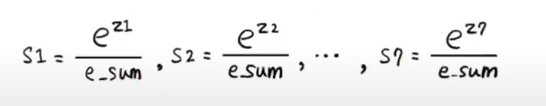

7개의 z값을 어떻게 확률로 계산한 것일까?

이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했다.

만약 7개의 z값을 시그모이드 함수를 통과시켜서 변환하면 7개의 결과값을 다 더했을 때 1이 나와야한다. 

당연히 합이 1이 안된다.

---

다중 분류에서는 소프트맥스(SoftMax)함수를 사용하여 7개의 z값을 확률로 변환한다.

소프트맥스의 계산 방식을 짚어보겠다.

먼저 7개의 z값을 z1 ~ z7이라고 붙이면 z1 ~ z7까지 값을 사용해 지수 함수 e^z1 ~ e^z7을 계산해 모두 더한다.

다 더한 값을 e_sum이라고 하겠다.

그 다음 e^z1 ~ e^z7을 각각 e_sum으로 나누어 주면 된다.

나누어 준 값들을 모두 더하면 분자와 분모가 같아지므로 1이 된다.

---

※ 여기서 잠깐 ※

시그모이드 함수는 하나의 선형 방정식의 출력값을 0 ~ 1 사이로 압축한다.

이와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고, 전체 합이 1이 되도록 만든다.

이를 위해 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 부른다.

In [26]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


decision_function() 메소드로 z값을 출력했다.

7개의 클래스이므로 당연히 5개 샘플에 대해서 각각 7개의 z값이 나왔다.

In [27]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


역시 사이파이는 소프트맥스 함수도 제공한다.

scipy.special 하위에 softmax() 함수를 임포트해서 사용하면 된다.

---

앞에서 구한 z값에 대한 decision 배열을 softmax() 함수에 전달했다.

softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정한다.

axis=1로 지정하면 각 행에 대해 계산한다.

axis=0로 지정하면 각 열에 대해 계산한다.

우리는 각 샘플에 대한 소프트맥스를 계산해야하므로 axis=1로 설정하였다.

만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.

---

출력 결과를 앞서 구한 predict_proba() 메소드를 사용해 구한 배열과 비교하니 정확히 일치했다.